<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/220716_Uber_Trips_Analysis_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This project was taken from the following link and I use it to practice my skills

https://thecleverprogrammer.com/2021/04/21/uber-trips-analysis-using-python/

https://medium.com/coders-camp/180-data-science-and-machine-learning-projects-with-python-6191bc7b9db9

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Ironhack/DBs/uber-raw-data-sep14.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Date/Time  1028136 non-null  object 
 1   Lat        1028136 non-null  float64
 2   Lon        1028136 non-null  float64
 3   Base       1028136 non-null  object 
dtypes: float64(2), object(2)
memory usage: 31.4+ MB


In [5]:
data.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [6]:
data.Base.sort_values().unique()

array(['B02512', 'B02598', 'B02617', 'B02682', 'B02764'], dtype=object)

In [7]:
data.isnull().sum(
)

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [8]:
data['Date/Time'] = data['Date/Time'].map(pd.to_datetime)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   Date/Time  1028136 non-null  datetime64[ns]
 1   Lat        1028136 non-null  float64       
 2   Lon        1028136 non-null  float64       
 3   Base       1028136 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 31.4+ MB


In [10]:
data['Day'] = data['Date/Time'].apply(lambda x: x.day)
data['Weekday'] = data['Date/Time'].apply(lambda x: x.weekday())
data['Hour'] = data['Date/Time'].apply(lambda x: x.hour)

In [11]:
data.head()

,Date/Time,Lat,Lon,Base,Day,Weekday,Hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0


In [12]:
data.Day.sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [13]:
data.Weekday.sort_values().unique()

array([0, 1, 2, 3, 4, 5, 6])

In [14]:
data.Hour.sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


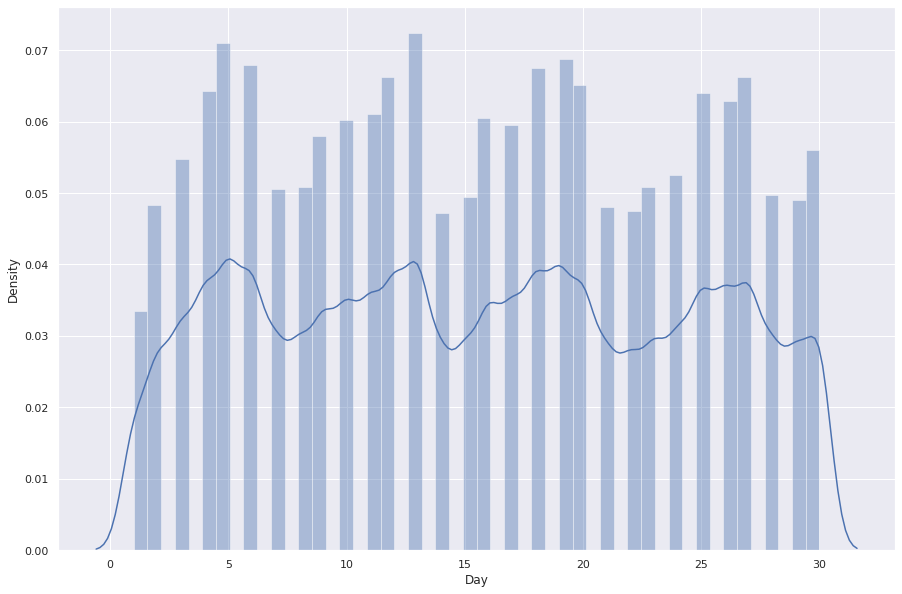

In [16]:
sns.set(rc={'figure.figsize':(15,10)})
sns.distplot(data.Day)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


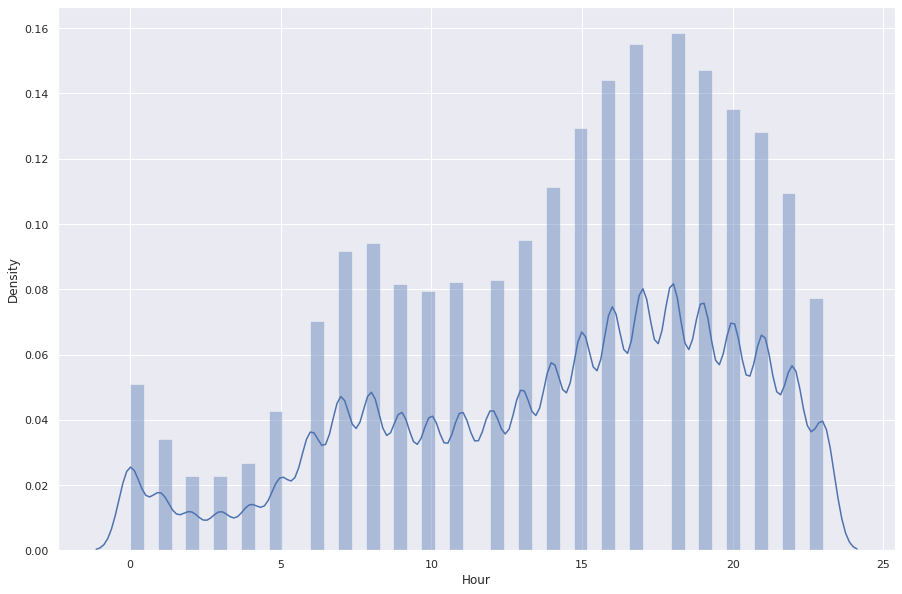

In [17]:
sns.distplot(data.Hour)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


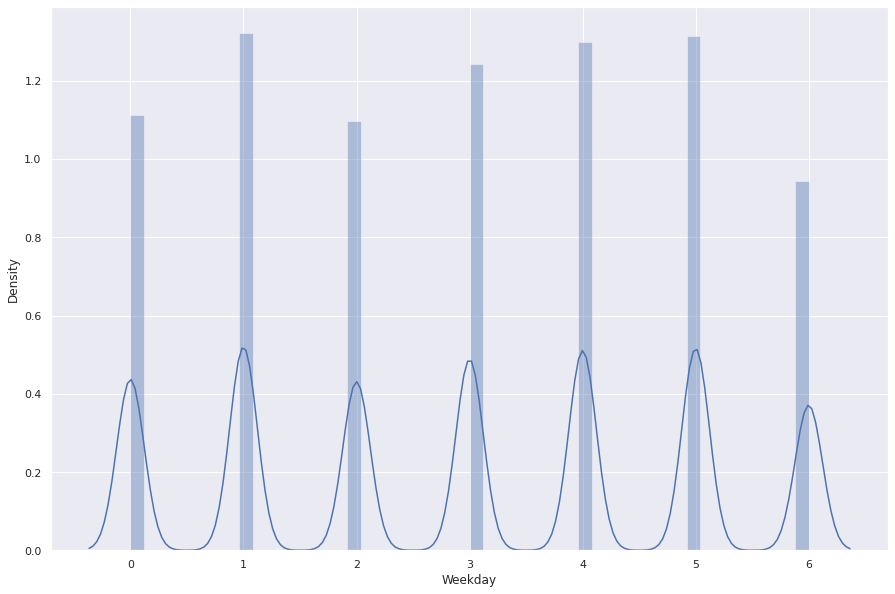

In [18]:
sns.distplot(data.Weekday)

In [19]:
data.corr()

,Lat,Lon,Day,Weekday,Hour
Lat,1.000000,0.046376,0.002558,-0.035468,-0.009160
Lon,0.046376,1.000000,-0.003939,0.002319,-0.008839
Day,0.002558,-0.003939,1.000000,0.049310,-0.023598
Weekday,-0.035468,0.002319,0.049310,1.000000,-0.003776
Hour,-0.009160,-0.008839,-0.023598,-0.003776,1.000000


In [23]:
df = data.groupby(['Weekday', 'Hour']).apply(lambda x: len(x))
df.head(50)

Weekday  Hour
0        0        1885
         1        1201
         2         977
         3        1780
         4        2479
         5        3905
         6        5668
         7        7223
         8        7287
         9        5892
         10       5358
         11       5461
         12       5415
         13       6245
         14       7113
         15       8346
         16       9513
         17       9841
         18       9611
         19       8725
         20       8318
         21       6979
         22       5130
         23       2936
1        0        1411
         1         784
         2         609
         3        1221
         4        2093
         5        4196
         6        7393
         7        9466
         8        9374
         9        7082
         10       6517
         11       6071
         12       5987
         13       7079
         14       8374
         15       9935
         16      11108
         17      12369
         18      121

In [25]:
df = df.unstack()

In [26]:
df

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Weekday,,,,,,,,,,,,,,,,,,,,,
0,1885,1201,977,1780,2479,3905,5668,7223,7287,5892,...,7113,8346,9513,9841,9611,8725,8318,6979,5130,2936
1,1411,784,609,1221,2093,4196,7393,9466,9374,7082,...,8374,9935,11108,12369,12184,11091,10370,9022,6538,2956
2,1489,885,597,966,1612,3130,5699,7067,6665,5356,...,6867,8331,9451,10294,10250,9268,9108,7951,6179,3408
3,1762,1037,714,1088,1720,2754,5586,7790,7663,6330,...,7419,8887,10196,11302,11738,10958,10076,9820,7885,5164
4,2513,1530,1002,1347,1819,3115,5186,6698,6715,5615,...,7431,8696,9792,11175,12315,11765,10345,10947,10797,9366
5,6909,4737,2957,2029,1458,1544,2092,2790,3664,4352,...,8732,9857,10494,11021,11753,11423,9841,10723,11173,10412
6,8164,5933,3846,2358,1494,1618,1683,2280,3109,3915,...,6707,7167,7670,7371,7189,6430,5930,5164,4115,2326


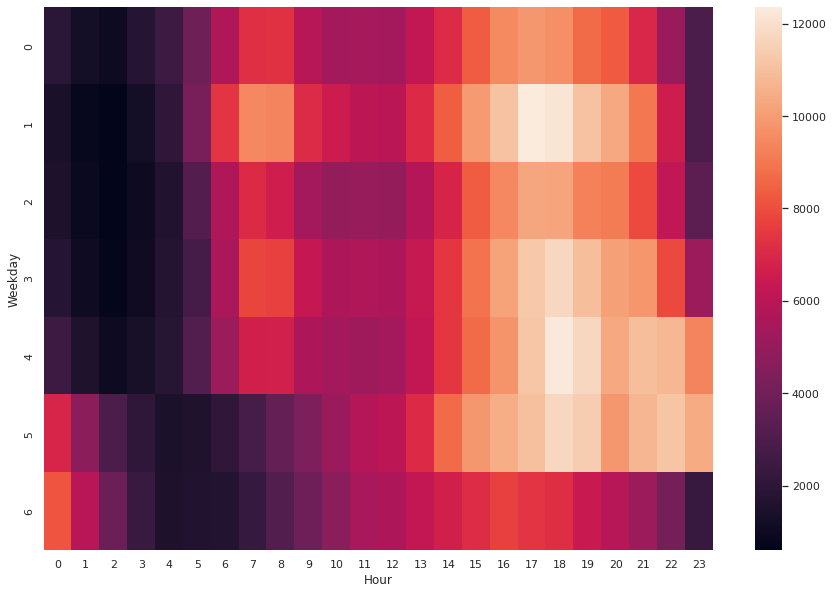

In [28]:
sns.heatmap(df, annot=False)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


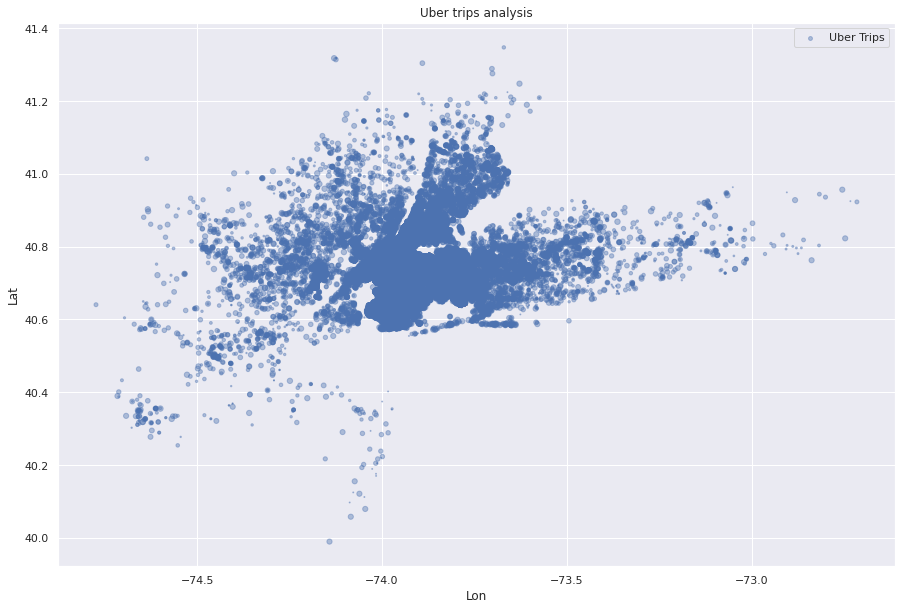

In [29]:
data.plot(kind='scatter', x='Lon', y='Lat', alpha=0.4, s=data['Day'], label='Uber Trips',
          figsize=(15,10), cmap=plt.get_cmap('jet'))
plt.title('Uber trips analysis')
plt.legend()
plt.show()